In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter
import datetime
import time
import nltk


In [2]:
# Reading the data
start_time = time.time()
train = pd.read_json('train.json')

stemmer = WordNetLemmatizer()
#cachedStopWords = stopwords.words("english")

# Auxiliar function for cleaning
def clean_recipe(recipe):
    # To lowercase
    recipe = [ str.lower(i) for i in recipe ]

    # Remove some special characters
    # Individuals replace have a very good performance
    # http://stackoverflow.com/a/27086669/670873
    def replacing(i):
        i = i.replace('&', '').replace('(', '').replace(')','')
        i = i.replace('\'', '').replace('\\', '').replace(',','')
        i = i.replace('.', '').replace('%', '').replace('/','')
        i = i.replace('"', '')
        
        return i
    
    # Replacing characters
    recipe = [ replacing(i) for i in recipe ]
    
    # Remove digits
    recipe = [ i for i in recipe if not i.isdigit() ]
    
    # Stem ingredients
    recipe = [ stemmer.lemmatize(i) for i in recipe ]
    
    return recipe



In [5]:
len(train)

39774

In [3]:
nltk.download('wordnet')
train['ingredients'] = train.ingredients.apply(lambda x: clean_recipe(x))
# print(train)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mniu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [4]:

# The number of times each ingredient is used is stored in the 'sumbags' dictionary
bags_of_words = [ Counter(clean_recipe(recipe)) for recipe in train.ingredients ]
# bags_of_words
sumbags = sum(bags_of_words, Counter())
load_time = time.time() - start_time
print(load_time)

KeyboardInterrupt: 

In [14]:
food_count = pd.DataFrame(sumbags, index=[0]).transpose()[0].sort(ascending=False, inplace=False)
food_count.to_csv('food_count.csv')

C:\Users\mniu\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


In [4]:
food_count = pd.read_csv('food_count.csv',encoding='latin-1',index_col=0)
global_food = food_count[:10]
print(global_food.index)
plt.figure(figsize=(10,10))
plt.bar(range(len(global_food)), list(global_food), align='center', alpha=0.5)
plt.xticks(range(len(global_food)), list(global_food.index), rotation=90,fontsize=13)
plt.ylabel('Recipe Count',fontsize=14)
plt.xlabel('Food Material',fontsize=14)
plt.title('Top 10 favorate food material in cooking all food',fontsize=20)
plt.xlim(-1, 10)
plt.show()
plt.savefig('Global.jpg')

Index(['onion', 'olive oil', 'water', 'garlic', 'sugar', 'garlic cloves',
       'butter', 'ground black pepper', 'all-purpose flour', 'pepper'],
      dtype='object', name='salt')


ValueError: incompatible sizes: argument 'height' must be length 10 or scalar

for ingredient in list(sumbags.keys()):
    train[ingredient] = train.ingredients.apply(lambda x: ingredient in x)

cuisine = train.drop(['ingredients', 'id'], axis=1).groupby('cuisine')
import numpy as np
cuisine = cuisine.aggregate(np.sum)
cuisine.T.to_csv('cuisine_count.csv')

In [5]:

cuisine = pd.read_csv('cuisine_count.csv',encoding='latin-1',index_col=0)
# cuisine = cuisine.T
# cuisine

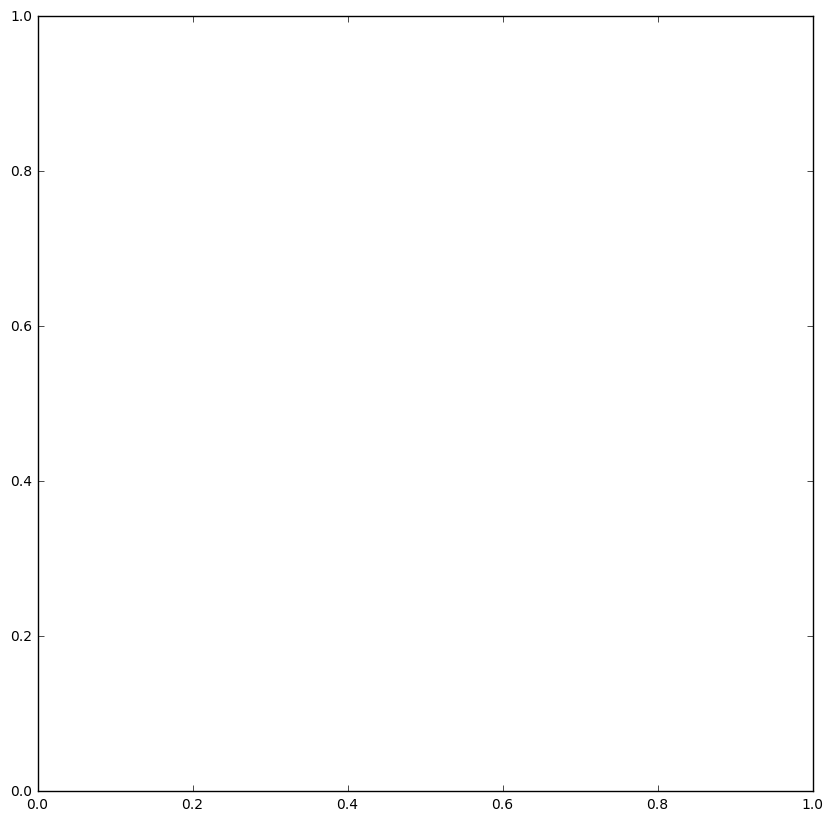

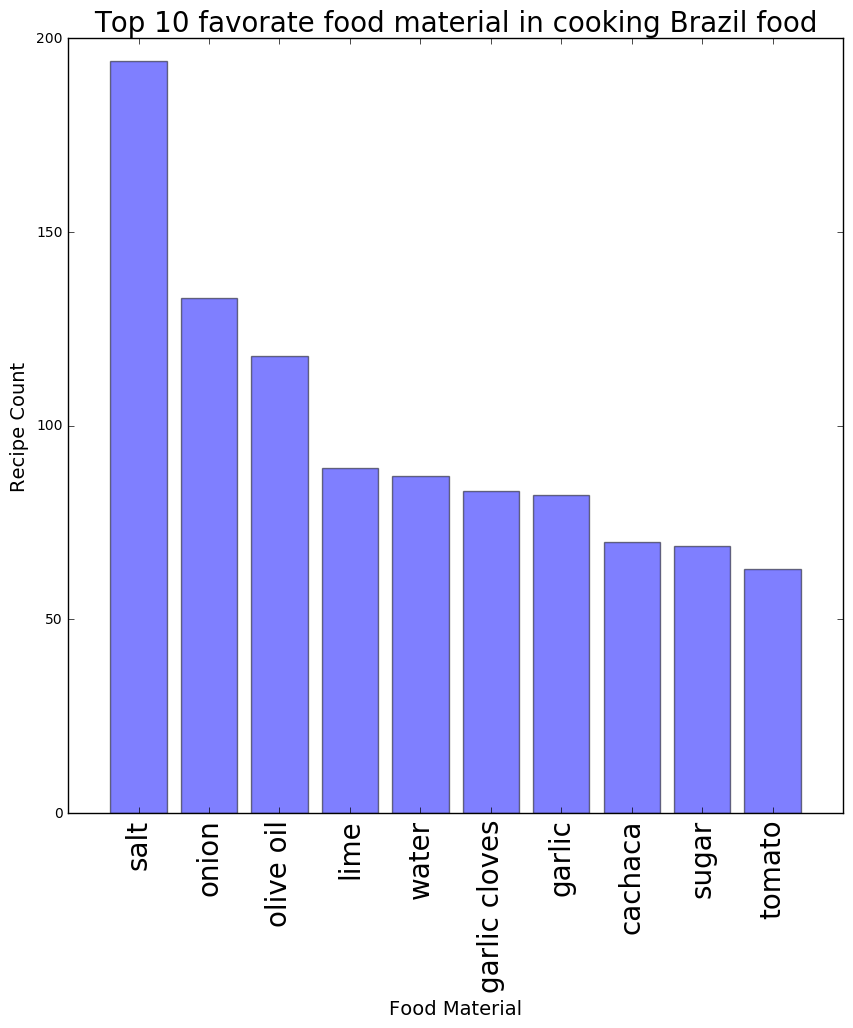

In [6]:

brazil_food = cuisine.loc['brazilian'].sort_values(ascending=False, inplace=False)[:10]

brazil_food = pd.DataFrame(brazil_food)
# print(brazil_food)
plt.figure(figsize=(10,10))
plt.bar(range(len(brazil_food)), list(brazil_food.brazilian), align='center', alpha=0.5)
plt.xticks(range(len(brazil_food)), list(brazil_food.index), rotation=90,fontsize=20)
plt.ylabel('Recipe Count',fontsize=14)
plt.xlabel('Food Material',fontsize=14)
plt.title('Top 10 favorate food material in cooking Brazil food',fontsize=20)
plt.xlim(-1, 10)
plt.show()
plt.savefig('Brazil.jpg')

Index(['soy sauce', 'sesame oil', 'salt', 'corn starch', 'sugar', 'garlic',
       'water', 'green onions', 'vegetable oil', 'scallion'],
      dtype='object')


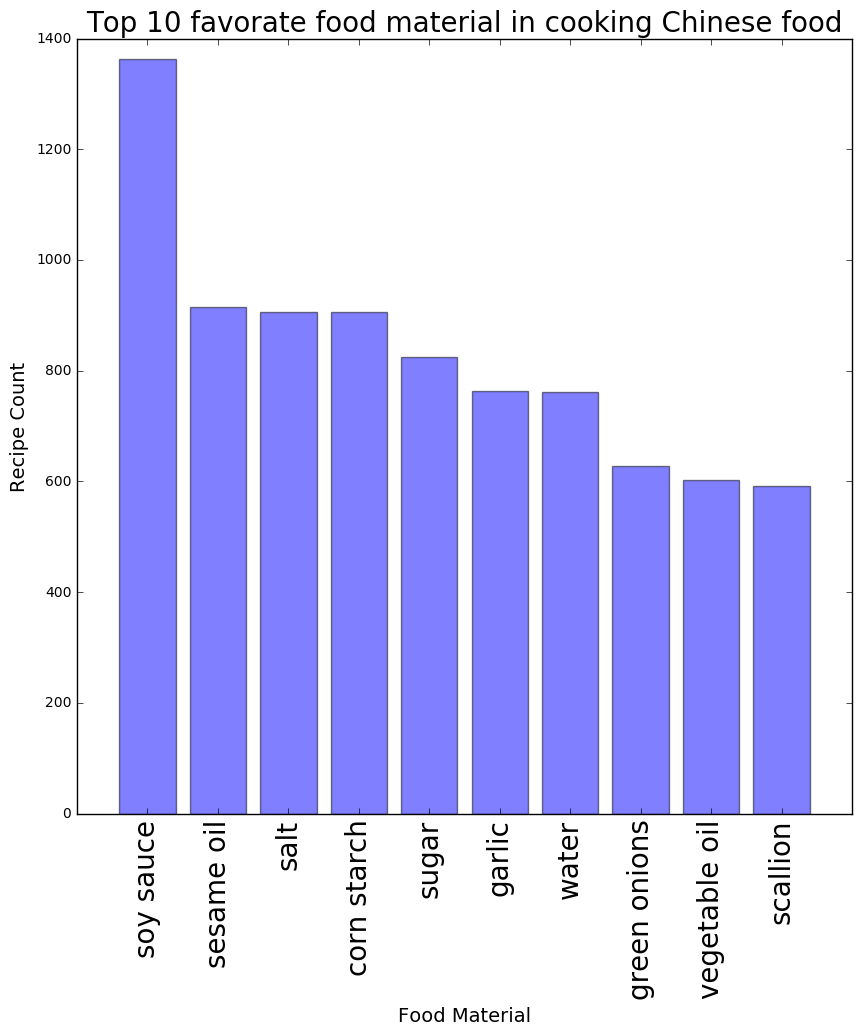

In [9]:
chinese_food = cuisine.loc['chinese'].sort_values(ascending=False, inplace=False)[:10]

chinese_food = pd.DataFrame(chinese_food)
print(chinese_food.index)
plt.figure(figsize=(10,10))
plt.bar(range(len(chinese_food)), list(chinese_food.chinese), align='center', alpha=0.5)
plt.xticks(range(len(chinese_food)), list(chinese_food.index), rotation=90,fontsize=20)
plt.ylabel('Recipe Count',fontsize=14)
plt.xlabel('Food Material',fontsize=14)
plt.title('Top 10 favorate food material in cooking Chinese food',fontsize=20)
plt.xlim(-1, 10)
plt.show()
plt.savefig('Chinese.jpg')

Index(['salt', 'butter', 'all-purpose flour', 'sugar', 'large eggs',
       'baking powder', 'water', 'unsalted butter', 'milk', 'buttermilk'],
      dtype='object')


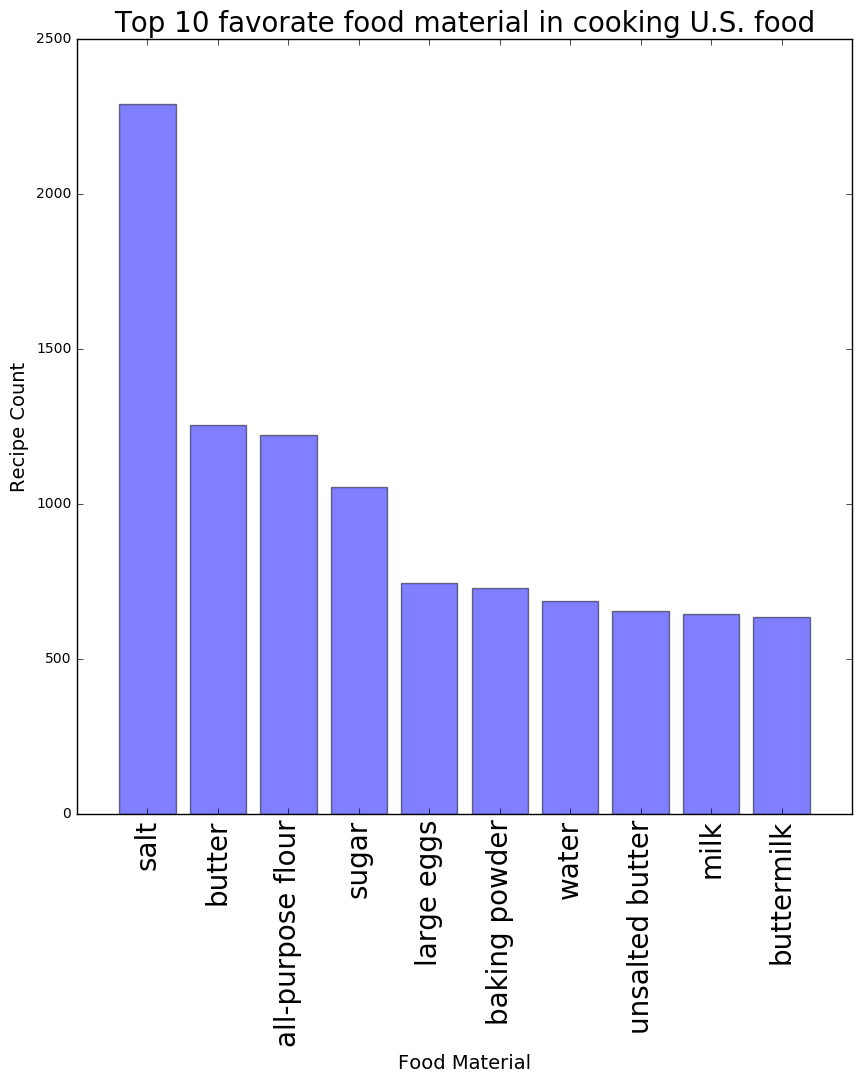

In [10]:
southern_us_food = cuisine.loc['southern_us'].sort_values(ascending=False, inplace=False)[:10]

southern_us_food = pd.DataFrame(southern_us_food)
print(southern_us_food.index)
plt.figure(figsize=(10,10))
plt.bar(range(len(southern_us_food)), list(southern_us_food.southern_us), align='center', alpha=0.5)
plt.xticks(range(len(southern_us_food)), list(southern_us_food.index), rotation=90,fontsize=20)
plt.ylabel('Recipe Count',fontsize=14)
plt.xlabel('Food Material',fontsize=14)
plt.title('Top 10 favorate food material in cooking U.S. food',fontsize=20)
plt.xlim(-1, 10)
plt.show()
plt.savefig('US.jpg')

In [ ]:
for i, c in enumerate(list(cuisine.index)):
    cuisine.loc[c].sort(inplace=False, ascending=False)[:10]
